# Recommenders Assignments

## 1. Content-Based Filtering: Cosine Similarity

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")
%config InlineBackened.format_figure = "svg"

In [ ]:
# 1. Read in the data from the first tab of the Movie Ratings spreadsheet, which contains genre labels
from google.colab import files
uploaded_file = files.upload()

Saving Movie_Ratings.xlsx to Movie_Ratings.xlsx


In [ ]:
df_movie = pd.read_excel("Movie_Ratings.xlsx", index_col=[1])
df_movie.index.name = None
df_movie.tail()

,Movie_ID,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Mat' i syn (1997),1678,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
B. Monkey (1998),1679,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
Sliding Doors (1998),1680,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
You So Crazy (1994),1681,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Scream of Stone (Schrei aus Stein) (1991),1682,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 2. Remove the non-genre columns of the movie genre data
movie = df_movie.iloc[:,1:].copy()
movie

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
GoldenEye (1995),1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Get Shorty (1995),1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
Copycat (1995),0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mat' i syn (1997),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
B. Monkey (1998),0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
Sliding Doors (1998),0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
You So Crazy (1994),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
movie.loc[["Toy Story (1995)" , "Get Shorty (1995)"]]

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Get Shorty (1995),1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 3. Calculate the cosine similarity of Toy Story (1995) and Get Shorty (1995)
from sklearn.metrics.pairwise import cosine_similarity
#cosine_matrix =cosine_similarity(movie)
selected_rows = movie.loc[["Toy Story (1995)","Get Shorty (1995)"]]
cosine_similarity(selected_rows)
# plt.figure(figsize=(12,8))
# sns.heatmap(cosine_similarity(movie), vmin = -1 , vmax = +1 , cmap = "coolwarm")
# plt.show()

array([[1.        , 0.33333333],
       [0.33333333, 1.        ]])

In [ ]:
cosine_similarity(selected_rows)[0][1].round(2)

np.float64(0.33)

In [ ]:
cosine_similarity(movie).shape

(1682, 1682)

In [ ]:
movie.shape

(1682, 18)

In [ ]:
# 4. Calculate the cosine similarity of Toy Story (1995) compared with all the movies
cosine_df = pd.DataFrame(cosine_similarity(movie) , columns = movie.index , index = movie.index)
cosine_df.loc["Toy Story (1995)"]#.plot.hist(bins = 5,alpha = 0.5, color = 'r')


,Toy Story (1995)
Toy Story (1995),1.000000
GoldenEye (1995),0.000000
Four Rooms (1995),0.000000
Get Shorty (1995),0.333333
Copycat (1995),0.000000
...,...
Mat' i syn (1997),0.000000
B. Monkey (1998),0.000000
Sliding Doors (1998),0.000000
You So Crazy (1994),0.577350


In [ ]:
# 5. Return the top 5 movies with the highest cosine similarity
cosine_df.loc[:,"Toy Story (1995)"].sort_values(ascending = False)[:6]

,Toy Story (1995)
Toy Story (1995),1.000000
Aladdin and the King of Thieves (1996),1.000000
"Goofy Movie, A (1995)",0.866025
Aladdin (1992),0.866025
Home Alone (1990),0.816497
Gumby: The Movie (1995),0.816497


## 2. User-Item Matrix

In [ ]:
# 1. Read in the movies, users and ratings tabs of the spreadsheet into three DataFrames
movies_uploaded = files.upload()

Saving Movie_Ratings.xlsx to Movie_Ratings (1).xlsx


In [ ]:
pd.ExcelFile('Movie_Ratings.xlsx').sheet_names

['movies', 'users', 'ratings', 'citation']

In [ ]:
movies = pd.read_excel('Movie_Ratings.xlsx', sheet_name='movies')
users = pd.read_excel('Movie_Ratings.xlsx', sheet_name='users')
ratings = pd.read_excel('Movie_Ratings.xlsx', sheet_name='ratings')

In [ ]:
ratings.head()

,User_ID,Movie_ID,Rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [ ]:
ratings.describe() # mean is 3.5 which is an candidate to fill the nan value or 3

,User_ID,Movie_ID,Rating
count,100000.00000,100000.000000,100000.000000
mean,462.48475,425.530130,3.529860
std,266.61442,330.798356,1.125674
min,1.00000,1.000000,1.000000
25%,254.00000,175.000000,3.000000
50%,447.00000,322.000000,4.000000
75%,682.00000,631.000000,4.000000
max,943.00000,1682.000000,5.000000


In [ ]:
# 2. Use .pivot to restructure the ratings data into a user-item matrix
X = ratings.pivot(index = 'User_ID' , columns="Movie_ID", values = "Rating").fillna(3.5)
X

Movie_ID,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
User_ID,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5
2,4.0,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,2.0,...,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5
3,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,...,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5
4,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,...,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5
5,4.0,3.0,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,...,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,5.0,3.5,...,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5
940,3.5,3.5,3.5,2.0,3.5,3.5,4.0,5.0,3.0,3.5,...,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5
941,5.0,3.5,3.5,3.5,3.5,3.5,4.0,3.5,3.5,3.5,...,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5


## 3. TruncatedSVD

In [ ]:
# 1. Apply TruncatedSVD to the user-item matrix from the last assignment
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)


In [ ]:
X.head()

Movie_ID,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
User_ID,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5
2,4.0,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,2.0,...,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5
3,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,...,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5
4,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,...,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5
5,4.0,3.0,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,...,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5


In [ ]:
# 2. View the user-item matrix and the shape of the user-item matrix
U = svd.fit_transform(X)
U

array([[144.37183636,   5.7525001 ],
       [143.87450132,  -0.93598804],
       [142.60980956,  -1.53651301],
       ...,
       [143.83165003,  -1.30478177],
       [145.04648241,   1.41257421],
       [143.21760649,   1.91781557]])

In [ ]:
U_df = pd.DataFrame(U , index = X.index)
U_df

,0,1
User_ID,,
1,144.371836,5.752500
2,143.874501,-0.935988
3,142.609810,-1.536513
4,144.021871,-1.558854
5,140.910449,1.214286
...,...,...
939,144.451034,-1.399357
940,143.445676,-0.727505
941,143.831650,-1.304782


In [ ]:
# 3. View the U matrix and the shape of the U matrix
U_df.shape

(943, 2)

In [ ]:
sigma = svd.singular_values_
sigma

array([4411.12172624,   69.74737606])

In [ ]:
# 4. View the VT matrix and the shape of the VT matrix
VT = svd.components_


In [ ]:
VT_df = pd.DataFrame(VT, columns=X.columns)
VT_df

Movie_ID,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
0,0.025641,0.024091,0.024061,0.024447,0.024243,0.024382,0.025238,0.025173,0.025247,0.024586,...,0.024360,0.024367,0.024360,0.024352,0.024360,0.024345,0.024360,0.024353,0.024360,0.024360
1,0.078089,-0.007936,-0.017139,0.040953,-0.013603,-0.005167,0.069187,0.067483,0.064704,0.004610,...,-0.003534,-0.002984,-0.003656,-0.004203,-0.003544,-0.002759,-0.003258,-0.003008,-0.003923,-0.003708


## 4. Choosing the Number of Components

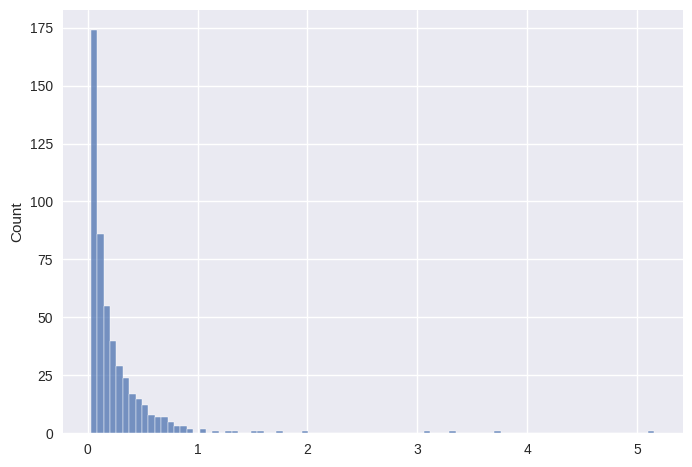

In [ ]:
# 1. Fit a TruncatedSVD model with 500 components
svd500 = TruncatedSVD(n_components=500)
U500 = svd500.fit_transform(X)
sns.histplot(svd500.explained_variance_)
sns.despine()

In [ ]:
svd500.explained_variance_

array([3.30464784, 5.15872022, 3.70727171, 3.0961757 , 1.98864575,
       1.74700439, 1.57302656, 1.52304596, 1.3553171 , 1.29216137,
       1.15941655, 1.04762091, 1.02216814, 0.9577186 , 0.92738958,
       0.88837244, 0.86414091, 0.84668343, 0.83989874, 0.81726872,
       0.80561861, 0.78265409, 0.77288123, 0.75906457, 0.74004577,
       0.73018205, 0.72371468, 0.71348736, 0.70417267, 0.695916  ,
       0.68579527, 0.67854866, 0.67225813, 0.65471423, 0.65298208,
       0.64708196, 0.63170818, 0.62154252, 0.62028771, 0.61435722,
       0.60628552, 0.59081876, 0.5894532 , 0.57933537, 0.5767016 ,
       0.56516377, 0.55988745, 0.55244839, 0.54967357, 0.54237363,
       0.53959966, 0.53104949, 0.52520088, 0.52214558, 0.5189165 ,
       0.51658516, 0.51247085, 0.50545989, 0.50382489, 0.49707231,
       0.49318483, 0.48968598, 0.48581083, 0.48429348, 0.4760005 ,
       0.47267496, 0.47004512, 0.46527868, 0.46336262, 0.45727527,
       0.45249479, 0.44590681, 0.4410761 , 0.43888511, 0.43797

In [ ]:
# 2. Plot the cumulative explained variance ratios
a = np.cumsum(svd500.explained_variance_ratio_)

In [ ]:
# sns.lineplot(pd.DataFrame(svd500.explained_variance_ratio_) ,
#              x = range(1,500+1),
#              y = np.cumsum(svd500.explained_variance_ratio_))
# sns.lineplot(pd.DataFrame(svd500.explained_variance_ratio_) ,
#              x = 500,
#              y = np.cumsum(svd500.explained_variance_ratio_)[-1], markers="o")
# plt.xlabel("components")
# plt.ylabel("Cumulative Explained Variance Ratio")
# plt.plot([500,500],[a[0],a[-1]], color = "cyan", linestyle = "dashed")
# plt.plot([0,500],[a[-1],a[-1]], color = "cyan", linestyle = "dashed")
# #plt.plot((500,a[-1]), "ro")
# #plt.plot([],[], "", ls = "")
# sns.despine()

In [ ]:
a = np.cumsum(svd500.explained_variance_ratio_)
np.argmax(a> 0.8)

np.int64(215)

In [ ]:
int(np.argmax(a > 0.8))

215

In [ ]:
a[250]

np.float64(0.8410876435712138)

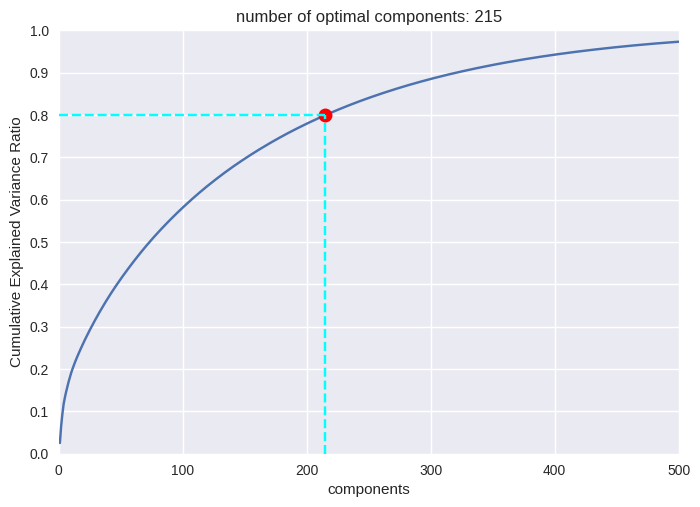

In [ ]:
sns.lineplot(x=list(range(1,500+1)),
             y=np.cumsum(svd500.explained_variance_ratio_))
a = np.cumsum(svd500.explained_variance_ratio_)
threshold_idx = np.argmax(a >= 0.8)
threshold_int = int(threshold_idx)
plt.title(f"number of optimal components: {threshold_int}")
plt.xlabel("components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.plot(threshold_int, a[threshold_int], marker='o', color = "red", markersize = 10)
plt.plot([threshold_int,threshold_int],[0,a[threshold_int]], color = "cyan", linestyle = "dashed")
plt.plot([0,threshold_int],[a[threshold_int],a[threshold_int]], color = "cyan", linestyle = "dashed")
plt.axis((0,500,0,1))
plt.yticks(np.arange(0,1.1,0.1))
sns.despine()

In [ ]:
# 3. Suggest a “good” number of components that best captures the info in the data set
# Based on the plot, a good number of components could be around 100-150, as the curve starts to flatten out.
# Let's choose 100 components as an example.
n_components = threshold_int
print(f"Suggested number of components: {n_components}")

Suggested number of components: 215


In [ ]:
# 4. Fit another TruncatedSVD model with the “good” number of components
svd_optimal = TruncatedSVD(n_components=threshold_int)
U_optimal = svd_optimal.fit_transform(X)

print("Shape of the new U matrix:")
print(U_optimal.shape)

Shape of the new U matrix:
(943, 215)


In [ ]:
X = (ratings.pivot(index='User_ID', columns='Movie_ID', values='Rating').fillna(3))
X.shape

(943, 1682)

## 5. Making Collaborative Filtering Recommendations

In [ ]:
# 1. View the new user vector
# use .pivot to restructure the ratings data into a user-item matrix
X = (ratings.pivot(index='User_ID', columns='Movie_ID', values='Rating').fillna(3))

# create a vector of NaN values
vector_length = X.shape[1] # 1682 : number of series[columns] in X
new_user = np.full(vector_length, np.nan)

# populate with 5 ratings
ratings = [5, 3, 5, 5, 4]
positions_to_populate = [11, 14, 28, 63, 66]
new_user[positions_to_populate] = ratings

# view as a DataFrame
new_user_df = pd.DataFrame([new_user], columns=movies.Movie_Title)
new_user_df

Movie_Title,Toy Story (1995),GoldenEye (1995),Four Rooms (1995),Get Shorty (1995),Copycat (1995),Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),Twelve Monkeys (1995),Babe (1995),Dead Man Walking (1995),Richard III (1995),...,Mirage (1995),Mamma Roma (1962),"Sunchaser, The (1996)","War at Home, The (1996)",Sweet Nothing (1995),Mat' i syn (1997),B. Monkey (1998),Sliding Doors (1998),You So Crazy (1994),Scream of Stone (Schrei aus Stein) (1991)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# view only the movies that the new user rated
new_user_df.T.dropna()

,0
Movie_Title,
"Usual Suspects, The (1995)",5.0
Mr. Holland's Opus (1995),3.0
Batman Forever (1995),5.0
"Shawshank Redemption, The (1994)",5.0
Ace Ventura: Pet Detective (1994),4.0


In [ ]:
new_user_df.T.dropna().mean()

,0
0,4.4


In [ ]:
# 2. Transform the user into the latent space using .transform()
new_user_optimal = svd_optimal.transform(new_user_df.fillna(4.4))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but TruncatedSVD was fitted without feature names
  warnings.warn(


In [ ]:
new_user_optimal.shape

(1, 215)

In [ ]:
svd_optimal.components_.shape

(215, 1682)

In [ ]:
# 3. Reconstruct the user-item matrix for the user using np.dot()
new_user_prep = np.dot(new_user_optimal, svd_optimal.components_)

In [ ]:
new_user_prep.shape

(1, 1682)

In [ ]:
# 4. Make 10 movie recommendations for the user
recs = pd.DataFrame(new_user_prep , columns= movies.Movie_Title, index = ["Recs"])
recs

Movie_Title,Toy Story (1995),GoldenEye (1995),Four Rooms (1995),Get Shorty (1995),Copycat (1995),Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),Twelve Monkeys (1995),Babe (1995),Dead Man Walking (1995),Richard III (1995),...,Mirage (1995),Mamma Roma (1962),"Sunchaser, The (1996)","War at Home, The (1996)",Sweet Nothing (1995),Mat' i syn (1997),B. Monkey (1998),Sliding Doors (1998),You So Crazy (1994),Scream of Stone (Schrei aus Stein) (1991)
Recs,4.417071,4.411874,4.413834,4.416822,4.401076,4.400902,4.419411,4.417725,4.44125,4.507874,...,4.400135,4.396954,4.400031,4.400409,4.398633,4.399082,4.39969,4.399386,4.400953,4.402116


In [ ]:
top_recs = recs.T.sort_values(["Recs"],ascending=False)[:10]
top_recs

,Recs
Movie_Title,
"Usual Suspects, The (1995)",4.786324
"Shawshank Redemption, The (1994)",4.733290
Batman Forever (1995),4.557197
Reservoir Dogs (1992),4.530370
"Blues Brothers, The (1980)",4.527524
Star Wars (1977),4.512454
Richard III (1995),4.507874
"Silence of the Lambs, The (1991)",4.507698
Rear Window (1954),4.501073


In [ ]:
user_index = new_user_df.T.dropna().index
user_index

Index(['Usual Suspects, The (1995)', 'Mr. Holland's Opus (1995)',
       'Batman Forever (1995)', 'Shawshank Redemption, The (1994)',
       'Ace Ventura: Pet Detective (1994)'],
      dtype='object', name='Movie_Title')

In [ ]:
movies

,Movie_ID,Movie_Title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
top_recs

,Recs
Movie_Title,
"Usual Suspects, The (1995)",4.786324
"Shawshank Redemption, The (1994)",4.733290
Batman Forever (1995),4.557197
Reservoir Dogs (1992),4.530370
"Blues Brothers, The (1980)",4.527524
Star Wars (1977),4.512454
Richard III (1995),4.507874
"Silence of the Lambs, The (1991)",4.507698
Rear Window (1954),4.501073


In [ ]:
# 5. Review the movies and determine if they make sense
top_recs.loc[top_recs.index.isin(user_index)]

,Recs
Movie_Title,
"Usual Suspects, The (1995)",4.786324
"Shawshank Redemption, The (1994)",4.733290
Batman Forever (1995),4.557197


In [ ]:
top_recs[~top_recs.index.isin(user_index)]

,Recs
Movie_Title,
Reservoir Dogs (1992),4.530370
"Blues Brothers, The (1980)",4.527524
Star Wars (1977),4.512454
Richard III (1995),4.507874
"Silence of the Lambs, The (1991)",4.507698
Rear Window (1954),4.501073
Apt Pupil (1998),4.500169


In [ ]:
# 6. Optional: Try playing around with the number of components to see the difference in movie recommendations
